# Actividad 5: Uso de software para busqueda
**Nombre**: Sebastián Eugenio Méndez Espinosa \
**Matricula:** 2024074 \
**Hora:** N4

# 1. Cargar librerías

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


# 2. Cargar datos

In [3]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

# 3. Preprocesamiento de datos

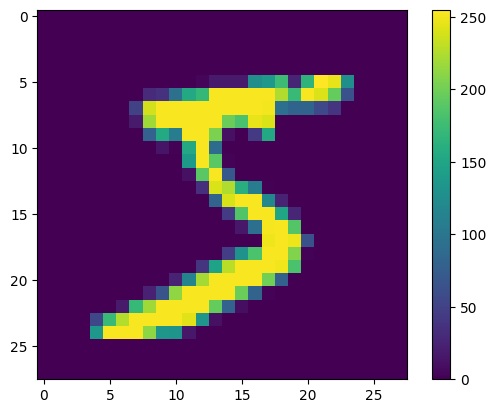

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

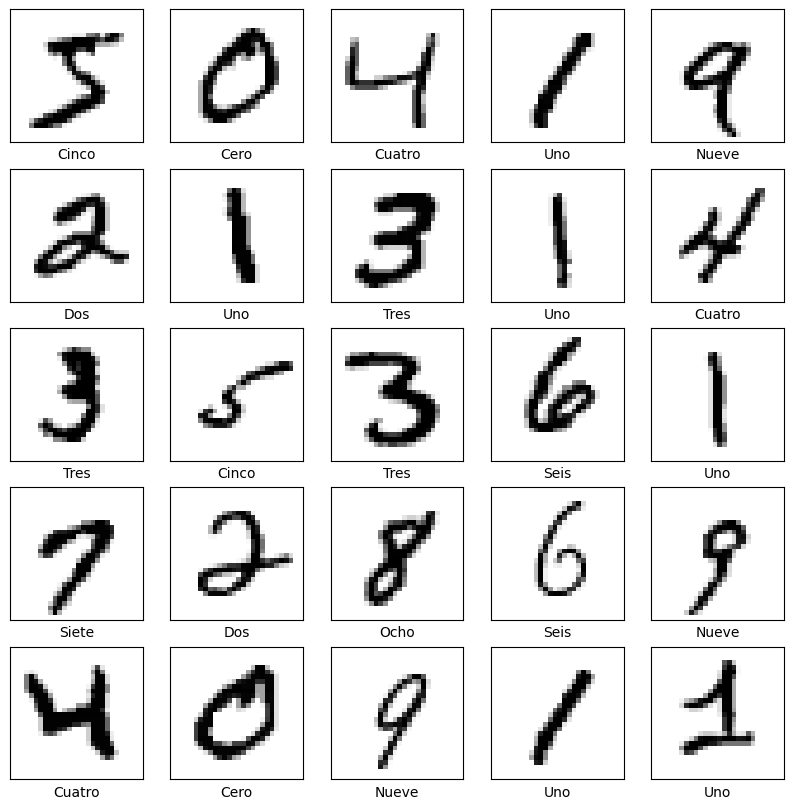

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 4. Selección y entrenamiento de modelo

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.1826 - accuracy: 0.7163
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4868 - accuracy: 0.8751
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3809 - accuracy: 0.8963
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3403 - accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3176 - accuracy: 0.9091
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3020 - accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2902 - accuracy: 0.9166
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2796 - accuracy: 0.9195
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2709 - accuracy: 0.9219
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

# 5. Prueba de Modelos

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2558 - accuracy: 0.9282 - 1s/epoch - 4ms/step

Test accuracy: 0.9282000064849854


In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
predictions[0]

array([1.2611222e-04, 1.3737713e-08, 1.4193993e-04, 2.4853654e-03,
       6.1941699e-07, 5.8332975e-05, 5.0219975e-09, 9.9630833e-01,
       2.0938318e-05, 8.5846806e-04], dtype=float32)

In [22]:
np.argmax(predictions[0])

7

In [23]:
test_labels[0]

7

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

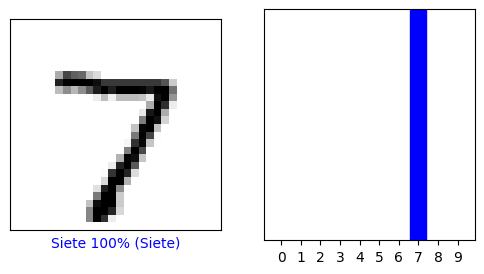

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

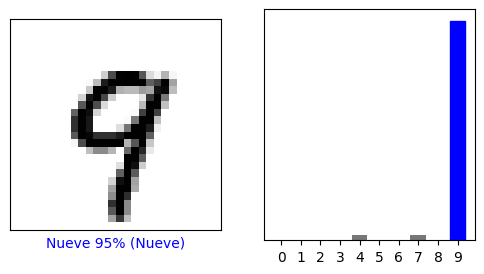

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

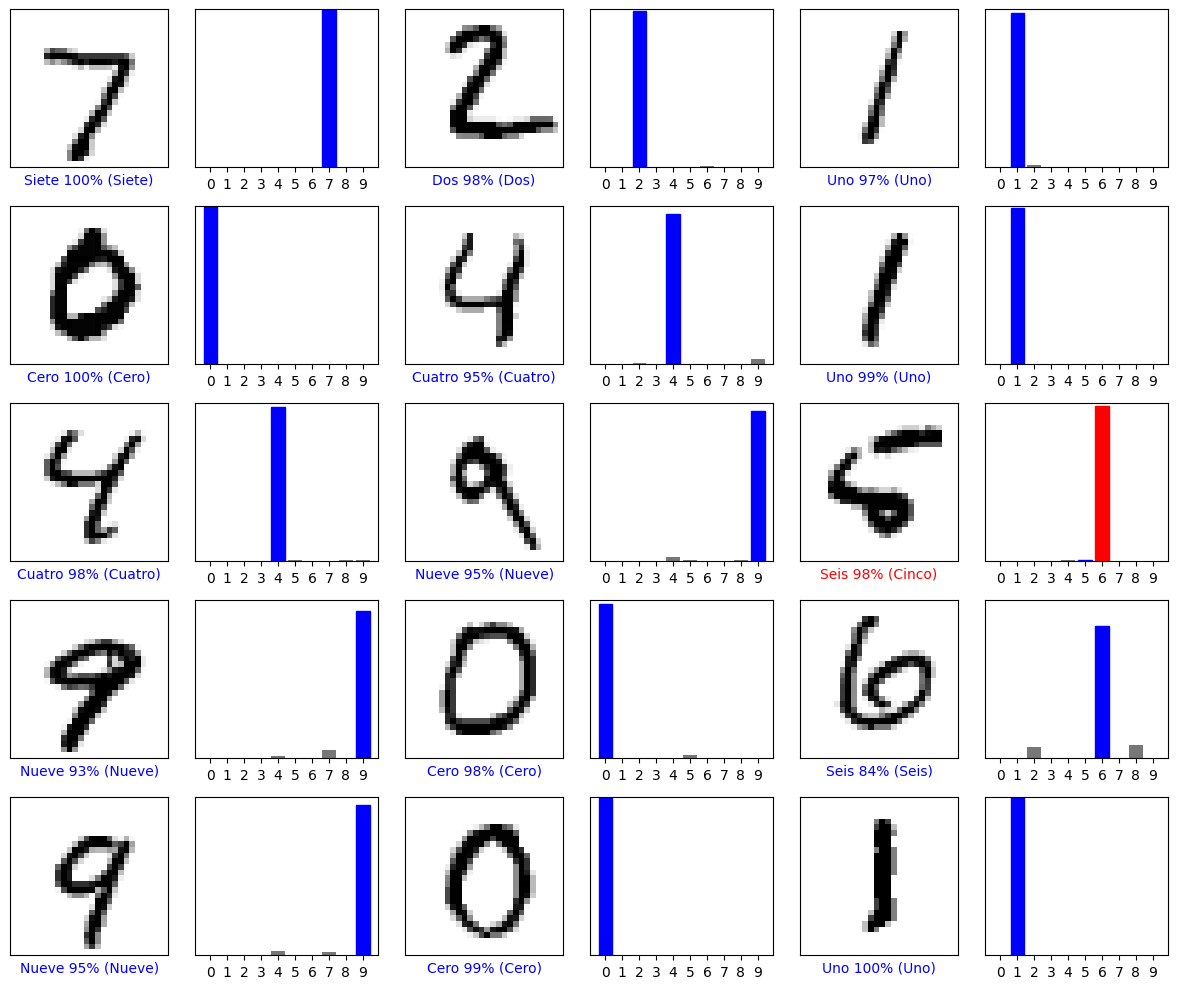

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
img = test_images[1]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 62ms/step
[[1.0021970e-03 5.0193121e-06 9.8444515e-01 3.5757911e-03 1.6297236e-11
  1.6934421e-03 8.9842621e-03 2.2019552e-12 2.9412194e-04 8.6553188e-11]]


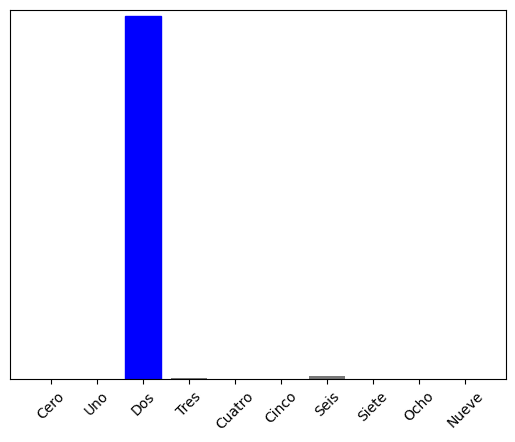

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
np.argmax(predictions_single[0])

2